# <center>Tugas Besar Individu Pembelajaran Mesin Lanjut</center>

<b>Topik</b>
Implementation of Swarm Intelligence

<b>Dikerjakan oleh</b>
Dawwi Raissa Damarjati Muljana - 1301213517

<b>Url presentasi</b>
https://youtu.be/V61azqeqe7M

Fungsi yang dikerjakan

Tulis fungsi di sini 
- F14 
Gambar Fungsi F14 ada di bawah

Range yang digunakan
- Misal: [-50, 100]

Algoritma yang digunakan
- Firefly
- RAO3

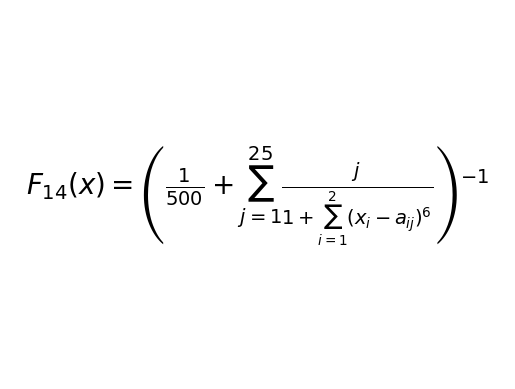

In [20]:
import matplotlib.pyplot as plt

# Formula dalam LaTeX 
latex_formula = r"$ F_{14}(x) = \left( \frac{1}{500} + \sum_{j=1}^{25} \frac{j}{1 + \sum_{i=1}^{2} (x_i - a_{ij})^6} \right)^{-1} $"

fig, ax = plt.subplots()

# Hide the axis
ax.axis('off')

# Add the formula text to the plot
ax.text(0.5, 0.5, latex_formula, horizontalalignment='center', verticalalignment='center', fontsize=20)

# Show the image
plt.show()

# Funsi F14

#### Importing Library

In [21]:
#importing
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation, PillowWriter
from tqdm import tqdm
from termcolor import colored
from IPython.display import display, HTML
from datetime import datetime
import time

#### F14 plot

Proses selesai
Waktu proses: 4.8163 detik


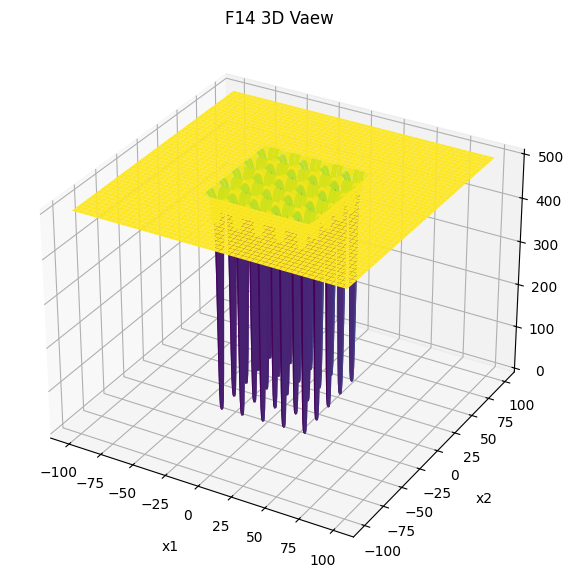

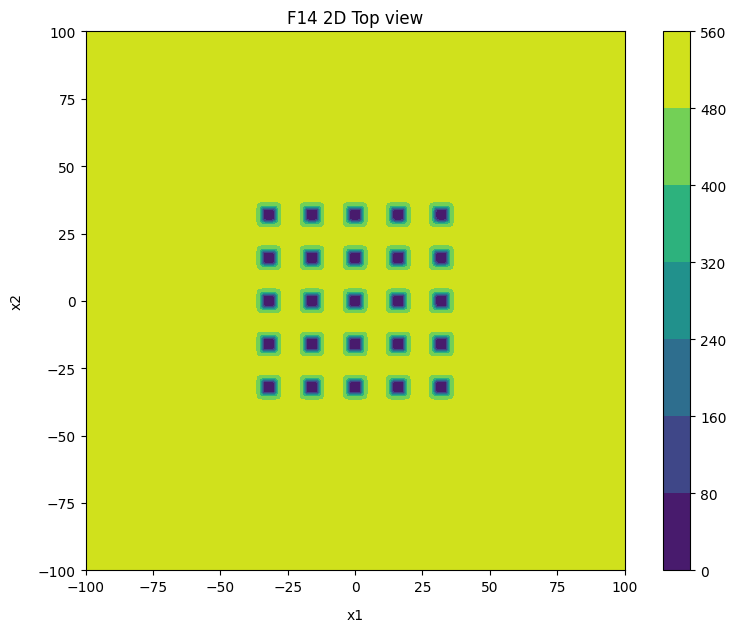

In [22]:
start_time = time.perf_counter()

# Function F14
def F14(x):
    # Matriks konstanta aS, yang berisi 25 pasangan koordinat (x, y)
    aS = np.array([
        [-32, -16, 0, 16, 32, -32, -16, 0, 16, 32, -32, -16, 0, 16, 32, -32, -16, 0, 16, 32, -32, -16, 0, 16, 32],
        [-32, -32, -32, -32, -32, -16, -16, -16, -16, -16, 0, 0, 0, 0, 0, 16, 16, 16, 16, 16, 32, 32, 32, 32, 32]
    ])
    
    # Mengubah x menjadi vektor kolom
    x = x.reshape(2, 1)
    
    # Menghitung bS sebagai jumlah dari (x - aS) pangkat 6 untuk setiap kolom aS
    bS = np.sum((x - aS) ** 6, axis=0)
    
    # Menghitung nilai fungsi F14 berdasarkan rumus yang diberikan
    # (1 / 500 + jumlah dari 1 / (1 sampai 25 + bS)) pangkat -1
    return (1 / 500 + np.sum(1 / (np.arange(1, 26) + bS))) ** -1


# Parameters
lb = -50  # lower bound
ub = 100  # upper bound

# Membuat gambar grid
x1 = np.linspace(-100, 100, 500)
x2 = np.linspace(-100, 100, 500)
x1, x2 = np.meshgrid(x1, x2)

z = np.zeros_like(x1)
for i in range(x1.shape[0]):
    for j in range(x1.shape[1]):
        z[i, j] = F14(np.array([x1[i, j], x2[i, j]]))

# Membuat Permukaan 3D
fig_3d = plt.figure(figsize=(10, 7))
ax1 = fig_3d.add_subplot(111, projection='3d')
ax1.plot_surface(x1, x2, z, cmap='viridis')
ax1.set_title('F14 3D Vaew')
ax1.set_xlabel('x1', labelpad=10)
ax1.set_ylabel('x2', labelpad=10)
ax1.set_zlabel('Fitness (x1, x2)', labelpad=10)


# Membuat Permukaan 2D
fig_2d = plt.figure(figsize=(10, 7))
ax2 = fig_2d.add_subplot(111)
contour = ax2.contourf(x1, x2, z, cmap='viridis')
fig_2d.colorbar(contour, ax=ax2)
ax2.set_title('F14 2D Top view')
ax2.set_xlabel('x1', labelpad=10)
ax2.set_ylabel('x2', labelpad=10)

# Menyelaraskan sumbu untuk membuat plot simetris
ax2.set_aspect('equal')

finish_time = time.perf_counter()

# Cetak hasil
print(colored("Proses selesai", "green"))
print(colored(f"Waktu proses: {finish_time - start_time:.4f} detik", "yellow"))
plt.show()
plt.show()

# Latar Belakang algoritma Firefly
Firefly atau FA adalah algoritma yang digunakan untuk optimasi yang terispirasi dari kunang-kunang dimana mereka menggunakan cahaya yang 
berkedip dengan ada nya bioluminesens untuk menarik pasangan. seberapa cepat dan pola kedipan nya cahaya nya ini lah yang menjadi cara mereka 
berkomunikasi, prinsip inilah yang dapa menarik satu kunang-kunang dengan lain nya, daya tarik sebanding dengan kecerahan dan menurun seiring 
jarak, serta kecerahan terkait dengan nilai fungsi objektif.

Dalam praktiknya, algoritma ini menginisialisasi populasi kunang-kunang dengan posisi acak, mengevaluasi kecerahan berdasarkan fungsi objektif, 
dan menggerakkan kunang-kunang yang kurang terang menuju yang lebih terang hingga mencapai konvergensi.

In [23]:
# Parameter Firefly Algorithm
populasi_f = 100  # Jumlah kunang-kunang dalam satu populasi
max_iter = 100  # Jumlah iterasi maksimum
lb, ub = -50, 100  # Batas bawah (lb) dan atas (ub) untuk posisi kunang-kunang

# Parameter Algoritma Kunang-Kunang
alpha = 0.5  # Parameter randomisasi
gamma = 0.5  # Koefisien penyerapan cahaya
beta_init = 0.5  # Nilai awal daya tarik (beta)

# Inisialisasi populasi dan fitness
# np.random.seed(42)  # Baris ini (dalam komentar) digunakan untuk menetapkan seed untuk menghasilkan hasil acak yang dapat direproduksi

# Inisialisasi posisi kunang-kunang secara acak dalam batas yang ditentukan
positions = np.random.uniform(lb, ub, (populasi_f, 2))

# Menghitung nilai fitness awal untuk setiap kunang-kunang berdasarkan fungsi F14
fitness = np.array([F14(pos) for pos in positions])


#### Algoritma Firefly

In [24]:
# Simpan data untuk animasi
history = []

# Melacak solusi terbaik yang ditemukan
best_position = None  # Inisialisasi posisi terbaik
best_fitness = np.inf  # Inisialisasi nilai fitness terbaik dengan nilai tak hingga

# Fungsi untuk menghitung jarak antara dua posisi
def distance(x, y):
    return np.linalg.norm(x - y)  # Menggunakan norma Euclidean untuk menghitung jarak

# Fungsi utama untuk Algoritma Kunang-Kunang
def firefly_algorithm():
    global positions, fitness, history, best_position, best_fitness  # Menggunakan variabel global yang diinisialisasi sebelumnya
    for t in tqdm(range(max_iter), desc="Progress", colour="green"):  # Loop untuk setiap iterasi dengan progress bar
        history.append(positions.copy())  # Simpan posisi kunang-kunang untuk animasi
        for i in range(populasi_f):
            for j in range(populasi_f):
                if fitness[j] < fitness[i]:  # Jika kunang-kunang j lebih terang (fitness lebih rendah) daripada kunang-kunang i
                    r = distance(positions[i], positions[j])  # Hitung jarak antara kunang-kunang i dan j
                    beta = beta_init * np.exp(-gamma * r)  # Hitung nilai daya tarik (beta) berdasarkan jarak

                    # Perbarui posisi kunang-kunang i menuju kunang-kunang j
                    new_position = positions[i] + beta * (positions[j] - positions[i]) + alpha * (np.random.rand(2) - 0.5)
                    
                    # Pastikan posisi baru berada dalam batas yang ditentukan
                    new_position = np.clip(new_position, lb, ub)
                    new_fitness = F14(new_position)  # Hitung nilai fitness untuk posisi baru
                    
                    if new_fitness < fitness[i]:  # Jika nilai fitness baru lebih baik (lebih rendah)
                        positions[i] = new_position  # Perbarui posisi kunang-kunang i
                        fitness[i] = new_fitness  # Perbarui nilai fitness kunang-kunang i
                        best_fitness = new_fitness  # Perbarui nilai fitness terbaik yang ditemukan
                        best_position = new_position.copy()  # Perbarui posisi terbaik yang ditemukan

    return positions  # Kembalikan posisi akhir kunang-kunang


Proses selesai
Waktu proses: -0.3307 detik


# Running Firefly algortima 

1. Inisialisasi Populasi:
   Ukuran populasi (populasi_f), yang berarti adalah kandidat dalam setiap iterasi.
        
2. Evaluasi Fitness:
   Fitness dari setiap individu dalam populasi dihitung menggunakan fungsi objektif F14.

3. Iterasi Optimasi:
   Algoritma melakukan iterasi sejumlah yang telah ditentukan (max_iter). Jika fitness individu lain lebih baik, individu tersebut akan bergerak mendekati individu lain tersebut berdasarkan parameter beta, gamma, dan alpha.

# Penjelasan

1. populasi_f (100):
   Jumlah kunang-kunang dalam populasi. Ukuran ini cukup besar untuk memastikan diversitas solusi, tetapi tidak terlalu besar untuk menghindari komputasi yang berat.
        
2. max_iter (100 ):
   Jumlah iterasi yang akan dilakukan. Angka ini dipilih untuk memberikan cukup waktu bagi algoritma untuk menjelajahi ruang pencarian dan menemukan solusi yang baik dan memberikan waktu yang cukup untuk hasil obserfasi.
         
3. lb, ub (-50, 100):
   Batas ruang pencarian. Ini ditentukan untuk tugas yang kali ini.
        
4. alpha (0.5):
   Koefisien acak yang mengontrol langkah acak kunang-kunang. Nilai ini dipilih untuk memberikan keseimbangan antara eksplorasi dan eksploitasi.
        
5. gamma (0.5):
   Parameter yang mengontrol tingkat penurunan kecerahan dengan jarak. Nilai ini mempengaruhi seberapa jauh kunang-kunang dapat dipengaruhi oleh kunang-kunang lain.

6. beta_init (0.5):
   Koefisien yang mengontrol daya tarik antara kunang-kunang. Nilai ini mempengaruhi seberapa kuat kunang-kunang tertarik satu sama lain.

Jumlah parameter ini di pilih karena sifat dan efek yang di berukan kepada kunang2 lain cukup untuk membuat kunang-kunang berhenti bergerak setelah semua nya memasukin posisi dan hampir setiap posisi di ini oleh kunang-kunang nya.

In [25]:
start_time = time.perf_counter()

# Jalankan algoritma Firefly
positions = firefly_algorithm()  # Memanggil fungsi firefly_algorithm untuk menjalankan algoritma

# Menyimpan posisi akhir kunang-kunang ke dalam history untuk keperluan animasi atau analisis lebih lanjut
history.append(positions.copy())  # Menambahkan salinan posisi akhir ke dalam daftar history

print(f"BEST RECORDING {best_position} with fitness {best_fitness}")

finish_time = time.perf_counter()

print(colored("FINISH RECORDING", "green"))
print(colored(f"Waktu proses: {finish_time - start_time:.4f} detik", "yellow"))

Progress: 100%|██████████| 100/100 [00:16<00:00,  6.25it/s]

BEST RECORDING [-15.97467599 -15.96986477] with fitness 6.903335694424798
FINISH RECORDING
Waktu proses: -0.3307 detik


#### Visualisasi dan animasi hasil plot

Proses selesai
Waktu proses: 12.3924 detik


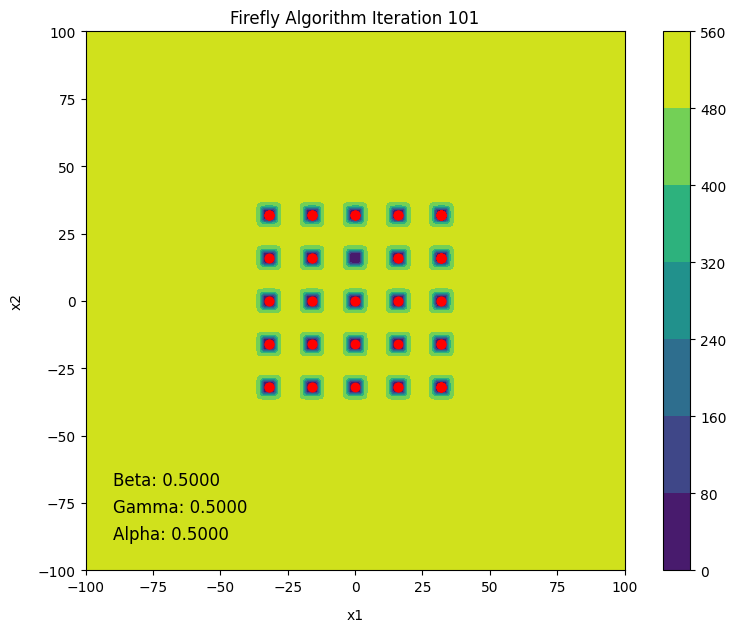

In [26]:
start_time = time.perf_counter()

# Prepare contour plot data
X1 = np.linspace(-100, 100, 400)
X2 = np.linspace(-100, 100, 400)
X1, X2 = np.meshgrid(X1, X2)
Z = np.array([F14(np.array([x1, x2])) for x1, x2 in zip(X1.ravel(), X2.ravel())]).reshape(X1.shape)

# Set up the plot and axes for animation
fig_2d = plt.figure(figsize=(10, 7))
ax2 = fig_2d.add_subplot(111)
contour = ax2.contourf(X1, X2, Z, cmap='viridis')
fig_2d.colorbar(contour, ax=ax2)
ax2.set_title('F14 2D Top view')
ax2.set_xlabel('x1', labelpad=10)
ax2.set_ylabel('x2', labelpad=10)

# Menyelaraskan sumbu untuk membuat plot simetris
ax2.set_aspect('equal')

# Tambahkan anotasi teks untuk alfa, gamma, dan beta di dalam plot
text_alpha = ax2.text(0.05, 0.05, f'Alpha: {alpha:.4f}', transform=ax2.transAxes, fontsize=12, color='black', verticalalignment='bottom', horizontalalignment='left')
text_gamma = ax2.text(0.05, 0.10, f'Gamma: {gamma:.4f}', transform=ax2.transAxes, fontsize=12, color='black', verticalalignment='bottom', horizontalalignment='left')
text_beta = ax2.text(0.05, 0.15, f'Beta: {beta_init:.4f}', transform=ax2.transAxes, fontsize=12, color='black', verticalalignment='bottom', horizontalalignment='left')


# Perbarui fungsi untuk animasi
def update(frame):
    positions = history[frame]
    scatter.set_offsets(positions)
    ax2.set_title(f'Firefly Algorithm Iteration {frame + 1}')
    return scatter, text_alpha, text_gamma, text_beta

scatter = ax2.scatter([], [], c='red')  # Solution candidates

ani = FuncAnimation(fig_2d, update, frames=len(history), blit=True, repeat=False)

# Simpan animasi sebagai GIF dengan nama bertambah
gif_filename = f'Firefly.gif'
ani.save(gif_filename, writer=PillowWriter(fps=5))

finish_time = time.perf_counter()

# Cetak hasil
print(colored("Proses selesai", "green"))
print(colored(f"Waktu proses: {finish_time - start_time:.4f} detik", "yellow"))
plt.show()

# Latar Belakang algoritma RAO3
RAO3 adalah salah satu algoritma optimasi. RAO3 adalah salah satu dari kelarga kode algoritma optimasi yang di rancang berdasarkan konsep sederhana tanpa memerlukan parameter yang spesifik atau pun kompleks sepeti faktor populasi, ukuran kelompok, atau parameter pembelajaran lain nyayang biasa nya di perlukan oleh algoritma lain. dalam kata lain RAO3 adalah alat optimasi yang sederhana namun kuat menawarkan solusi yang efektif untuk berbagai masalah tanpa memerlukan parameter yang kompleks.

In [27]:
populasi_r3 = 75  # Jumlah individu dalam populasi
iterations = 100  # Jumlah iterasi yang akan dijalankan
bounds = [-50, 100]  # Batas bawah dan atas untuk posisi dalam ruang pencarian

# Inisialisasi populasi awal secara acak dalam batas yang ditentukan
# np.random.seed(20)  # Baris ini (dalam komentar) digunakan untuk menetapkan seed untuk menghasilkan hasil acak yang dapat direproduksi

# Membuat populasi awal dengan posisi acak dalam batas [bounds[0], bounds[1]]
population = np.random.uniform(bounds[0], bounds[1], (populasi_r3, 2))


In [28]:
start_time = time.perf_counter()

# Fungsi untuk menghitung nilai fitness
def calculate_fitness(population):
    # Menggunakan fungsi F14 untuk menghitung fitness setiap individu dalam populasi
    return np.array([F14(individual) for individual in population])

# Menghitung nilai fitness untuk populasi awal
fitness = calculate_fitness(population)

# Mencetak nilai fitness untuk populasi awal
print(fitness)


finish_time = time.perf_counter()

# Cetak hasil
print(colored("Proses selesai", "green"))
print(colored(f"Waktu proses: {finish_time - start_time:.4f} detik", "yellow"))

[499.99968924 499.99997306 499.97778775 499.99909724 499.99814031
 499.9999923  487.93421677 425.42552686 441.6580457  499.99997449
 499.99958621 499.99998084 499.44752728 497.96850974 498.07333585
 499.99997211 499.96827137 499.99965359 499.05774711 499.99998769
 488.02020487 499.99989412 497.4577659  479.56309612 499.99926623
 499.99997203 499.99713153 499.99993    499.99997011 498.03552554
 499.99944075  36.88505001 499.93851815 237.38693848 499.99991677
 499.99996729 499.99205235 499.96631805 498.92083619  71.010314
 499.9998804  499.99996603 497.69852211 497.33208951 499.99842408
 422.79675627 479.60911013 499.99972132 497.57660958 499.99996124
 499.99979836 499.99997764 499.99998712 499.99796762 499.97884492
 397.88342886 499.99956281 499.99946627 499.9440324  499.99997989
 499.97227788 499.99996477 499.99962559 499.9939401  493.67821515
 499.99850762 496.59587785 497.99015469 499.99865852 475.40268783
 499.99898567 499.99983175 499.99996471 499.99962366 499.99998496]


#### RAO3 Algoritma

In [29]:
# Mulai timer untuk menghitung waktu eksekusi
start_time = time.perf_counter()

# Fungsi untuk menjalankan algoritma RAO3
def RAO3(populasi_r3, iterations, bounds, fobj):
    # Inisialisasi populasi secara acak dalam batas yang ditentukan
    population = np.random.uniform(bounds[0], bounds[1], (populasi_r3, len(bounds)))
    
    # Hitung nilai fitness awal untuk setiap individu dalam populasi
    fitness = np.array([fobj(ind) for ind in population])
    
    # Temukan solusi terbaik dan terburuk dalam populasi
    best_sol = population[np.argmin(fitness)]  # Solusi terbaik (fitness terendah)
    worst_sol = population[np.argmax(fitness)]  # Solusi terburuk (fitness tertinggi)
    
    # Simpan sejarah populasi untuk keperluan analisis atau animasi
    history = [population.copy()]
    
    # Loop utama untuk iterasi algoritma
    for _ in tqdm(range(iterations), desc="Progress", colour="green"):
        for i in range(populasi_r3):
            k = np.random.randint(populasi_r3)  # Pilih individu acak dari populasi
            r1, r2 = np.random.random(), np.random.random()  # Generate dua angka acak antara 0 dan 1
            
            # Perbarui solusi berdasarkan kondisi fitness
            if fobj(population[i]) < fobj(population[k]):
                new_sol = population[i] + r1 * (best_sol - np.abs(worst_sol)) + r2 * (np.abs(population[i]) - population[k])
            else:
                new_sol = population[i] + r1 * (best_sol - np.abs(worst_sol)) + r2 * (np.abs(population[k]) - population[i])
            
            # Pastikan solusi baru berada dalam batas yang ditentukan
            new_sol = np.clip(new_sol, bounds[0], bounds[1])
            
            # Jika solusi baru lebih baik (fitness lebih rendah), perbarui populasi
            if fobj(new_sol) < fobj(population[i]):
                population[i] = new_sol
        
        # Perbarui nilai fitness, solusi terbaik, dan solusi terburuk untuk iterasi berikutnya
        fitness = np.array([fobj(ind) for ind in population])
        best_sol = population[np.argmin(fitness)]
        worst_sol = population[np.argmax(fitness)]
        
        # Simpan populasi saat ini ke dalam sejarah
        history.append(population.copy())
    
    # Kembalikan sejarah dan solusi terbaik yang ditemukan
    return history, best_sol

# Selesai timer untuk menghitung waktu eksekusi
finish_time = time.perf_counter()

# Cetak hasil waktu eksekusi
print(colored("Proses selesai", "green"))
print(colored(f"Waktu proses: {finish_time - start_time:.4f} detik", "yellow"))


#### Running RAO3 algortima 

1. Inisialisasi Populasi:
   Ukuran populasi (population_r3),adalah kandidat dalam setiap iterasi.
2. Evaluasi Fitness:
   Fitness dari setiap individu dalam populasi dihitung menggunakan fungsi objektif F14.
   Solusi terbaik (best_sol) dan solusi terburuk (worst_sol) diidentifikasi berdasarkan nilai fitness.
3. Iterasi Optimasi:
   Algoritma melakukan iterasi sejumlah yang telah ditentukan (iterations).
   Solusi baru dihasilkan dengan kombinasi dari solusi terbaik, solusi terburuk, dan solusi saat ini.
   Solusi baru dikontrol agar tetap dalam batas yang ditentukan (bounds).

Parameter Algoritma
1. pop_size (75):
   Jumlah individu dalam populasi. Ukuran ini cukup besar untuk memastikan diversitas solusi, tetapi tidak terlalu besar untuk menghindari komputasi yang berat.

2. iterations (100):
   Jumlah iterasi yang akan dilakukan. Angka ini dipilih untuk memberikan cukup waktu bagi algoritma untuk menjelajahi ruang pencarian dan menemukan solusi yang baik sampai tidak ada banyak perubahan yang signifikan lagi saat di obserfasi.

3. bounds ([-50, 100]):
   Batas ruang pencarian. Ini ditentukan untuk tugas yang kali ini.

In [30]:
start_time = time.perf_counter()


# Call the RAO3 function with the F14 function as the objective function
history, best_solution = RAO3(populasi_r3, iterations, bounds, F14)

# Output the best solution found
print("Best solution:", best_solution)

finish_time = time.perf_counter()

# Cetak hasil
print(colored("Proses selesai", "green"))
print(colored(f"Waktu proses: {finish_time - start_time:.4f} detik", "yellow"))
plt.show()

Progress: 100%|██████████| 100/100 [00:00<00:00, 118.02it/s]

Best solution: [-31.71928286 -32.05538852]
Proses selesai
Waktu proses: 0.8521 detik


Proses selesai
Waktu proses: 13067.5148 milliseconds


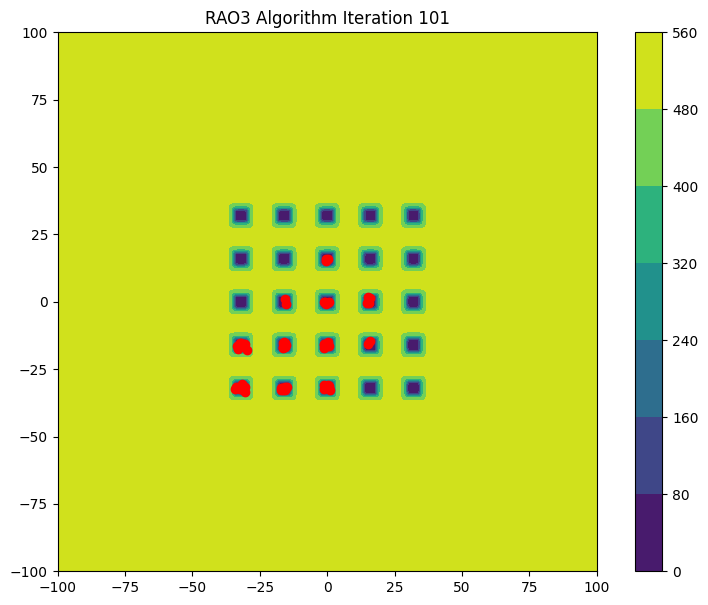

In [31]:
start_time = time.perf_counter()

# Prepare contour plot data
bounds1 = -100
bounds2 = 100
X1 = np.linspace(bounds1, bounds2, 400)
X2 = np.linspace(bounds1, bounds2, 400)
X1, X2 = np.meshgrid(X1, X2)
Z = np.array([F14(np.array([x1, x2])) for x1, x2 in zip(X1.ravel(), X2.ravel())]).reshape(X1.shape)

# Set up the plot and axes for animation
fig, ax = plt.subplots(figsize=(10, 7))
ax.set_xlim(bounds1, bounds2)
ax.set_ylim(bounds1, bounds2)
contour = ax.contourf(X1, X2, Z, cmap='viridis')
fig.colorbar(contour, ax=ax)
scatter = ax.scatter([], [], c='red')  # Solution candidates

# Menyelaraskan sumbu untuk membuat plot simetris
ax.set_aspect('equal')

# Update function for animation
def update(frame):
    positions = history[frame]
    scatter.set_offsets(positions)
    ax.set_title(f'RAO3 Algorithm Iteration {frame + 1}')
    return scatter,

ani = FuncAnimation(fig, update, frames=len(history), blit=True, repeat=False)

# Save the animation as a GIF with incremented name
gif_filename = f'RAO3.gif'
ani.save(gif_filename, writer=PillowWriter(fps=2))

# Selesai menghitung waktu
finish_time = time.perf_counter()

# Cetak hasil
print(colored("Proses selesai", "green"))
print(colored(f"Waktu proses: {finish_time - start_time:.4f} detik", "yellow"))

# Show animation
plt.show()

# Hasil dan Analisis

### Firefly Algoritma

#### Parameter:

- Populasi: 100
- Iterasi: 100
- Alpha: 0.5
- Gamma: 0.5
- Beta: 0.5
- Batas pencarian: [-50, 100]

#### Observasi:

- Pada iterasi awal, kunang-kunang tersebar secara acak di ruang pencarian.
- Seiring berjalannya iterasi, kunang-kunang mulai bergerak menuju area dengan nilai fitness lebih baik.
- Pada iterasi 16-20 sudah tidak ada pergerak yang signifikan lagi.
- bisa di lihat di bagian atas kanan kunang-kunang masuk hampir seperiti berbarih mengingkutin kunang-kunang di depan nya
- semua kunang-kunang nya berhenti secara rapih di dalam titik minima.
- Bisa di sebut selasai kurang lebih di Iterasi 20. 

### RAO3

#### Parameter:

- Populasi: 75
- Iterasi: 100
- Batas pencarian: [-50, 100]


#### Observasi:

- Pada iterasi awal, kunang-kunang tersebar secara acak di ruang pencarian.
- Seiring berjalannya iterasi, kunang-kunang mulai bergerak menuju area dengan nilai fitness lebih baik.
- Pada iterasi 10 semua kunang-kunang nya sudah sangat dekat area minimal.
- Pada iterasi 20 sampai 30 semua kunang-kunang sudah memasukin daerah minima tetapi masih ada bergerak antara dearah.
- pada iterasi 40 pergerakan sudah tidak singnifikan.
- Bisa di sebut selasai kurang lebih di Iterasi 40. 

#### Kesimpulan
RAO3 Algorithm menunjukkan kemampuan yang baik dalam mengkonvergensi ke solusi optimal. Dengan parameter yang telah ditetapkan, algoritma berhasil menemukan area minima dalam 40 iterasi. Selama proses iterasi, terlihat bahwa kunang-kunang secara efektif mengeksplorasi dan mengeksploitasi ruang pencarian untuk menemukan solusi terbaik. Pada iterasi ke-40, pergerakan individu dalam populasi sudah sangat minimal, menandakan bahwa algoritma telah mencapai konvergensi. Ini menunjukkan bahwa RAO3 adalah algoritma yang efisien untuk masalah optimasi dengan parameter dan batas pencarian yang diberikan.





